# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Jeriko Gormantara
- **Email:** jeriko.025@gmail.com
- **ID Dicoding:** jerikogormantara

## Menentukan Pertanyaan Bisnis

- Top 10 kota apa saja yang memiliki frekuensi pembelian terbanyak?
- Metode pembayaran apa yang paling sering digunakan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
payments_df = pd.read_csv("order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Tabel customers berisi data pelanggan dengan kolom penting seperti customer_id, customer_city, dan customer_state.
- Tabel orders menyimpan informasi detail tentang pesanan seperti order_id, order_status, dan timestamp-timestamp penting (pembelian, persetujuan, pengiriman, dll).
- Tabel payments memuat informasi pembayaran tiap pesanan, termasuk payment_type, payment_installments, dan payment_value.

### Assessing Data


####Menilai tabel customers_df


In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [ ]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


####Menilai tabel orders_df


In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


####Menilai tabel payments_df


In [ ]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [ ]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- Tabel customers tidak ada missing values dan tidak ada data yang duplikat.
- Tabel orders terdapat missing values, tidak ada duplikat data, dan tipe data untuk kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date harusnya bertipe datetime bukan object.
- Tabel payments tidak ada missing values dan tidak ada data yang duplikat.





### Cleaning Data

#### Mengubah tipe data object ke datetime pada tabel orders_df

In [ ]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

#### Menghapus missing values

In [ ]:
orders_df = orders_df[orders_df['order_status'] == 'delivered']
orders_df = orders_df.dropna()

In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


**Insight:**
- Order yang dianalisis hanya yang berstatus delivered, yaitu order yang telah selesai diproses dan diterima oleh pelanggan. Dengan demikian, baris yang memiliki missing values dihapus, sehingga orders_df hanya berisi data transaksi yang lengkap dan sukses.
- Tabel customers_df dan payments_df sudah bersih karena tidak ada missing values dan tidak ada data yang duplikat.

## Exploratory Data Analysis (EDA)

### Membuat tabel gabungan dengan menggunakan join

In [9]:
# Gabung orders dengan customers
merged1_df = orders_df.merge(customers_df, on='customer_id', how='inner')

# Gabung dengan payments
merged_df = merged1_df.merge(payments_df, on='order_id', how='inner')


merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103886 non-null  object 
 1   customer_id                    103886 non-null  object 
 2   order_status                   103886 non-null  object 
 3   order_purchase_timestamp       103886 non-null  object 
 4   order_approved_at              103711 non-null  object 
 5   order_delivered_carrier_date   101998 non-null  object 
 6   order_delivered_customer_date  100754 non-null  object 
 7   order_estimated_delivery_date  103886 non-null  object 
 8   customer_unique_id             103886 non-null  object 
 9   customer_zip_code_prefix       103886 non-null  int64  
 10  customer_city                  103886 non-null  object 
 11  customer_state                 103886 non-null  object 
 12  payment_sequential            

**Insight:**
- Agar dapat menjawab dua pertanyaan bisnis yang didefinisikan, saya menggabungkan 3 tabel tersebut menggunakan join.

### EDA Univariate

In [10]:
print(merged_df['customer_city'].nunique())
print(merged_df['customer_city'].value_counts().head(10))

4119
customer_city
sao paulo                16221
rio de janeiro            7207
belo horizonte            2872
brasilia                  2193
curitiba                  1576
campinas                  1515
porto alegre              1418
salvador                  1347
guarulhos                 1250
sao bernardo do campo      979
Name: count, dtype: int64


**Insight:**
Terdapat 4119 kota unik di dataset ini. Kota dengan transaksi terbanyak adalah São Paulo (15.695 transaksi), diikuti oleh Rio de Janeiro (6916 transaksi) dan Belo Horizonte (2792 transaksi).

In [11]:
print(merged_df['payment_type'].value_counts())
print(merged_df['payment_type'].value_counts(normalize=True) * 100)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64
payment_type
credit_card    73.922376
boleto         19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: proportion, dtype: float64


**Insight:**
Mayoritas metode pembayaran yang digunakan adalah credit_card (74%), diikuti oleh boleto (19%), voucher (5.5%), dan debit_card (1.5%).

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64


<Axes: >

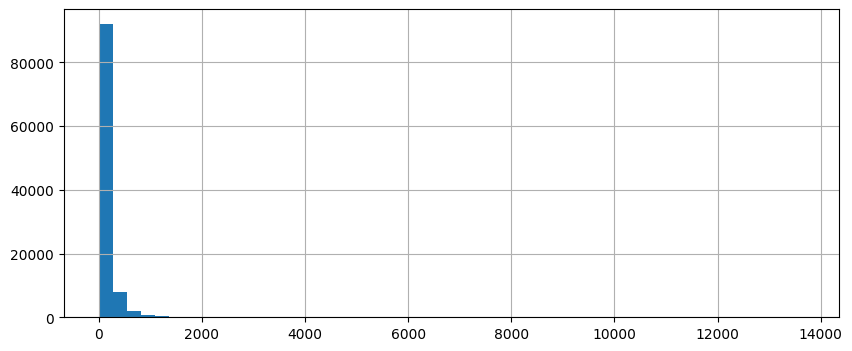

In [19]:
print(merged_df['payment_value'].describe())
merged_df['payment_value'].hist(bins=50, figsize=(10, 4))

**Insight:**
Median dan rata-rata payment_value cukup jauh, menunjukkan distribusi skewed. Rata-rata pembayaran adalah sekitar 154, dengan median 99.9. Terdapat pembayaran hingga 13664, menunjukkan adanya outlier atau high spender.

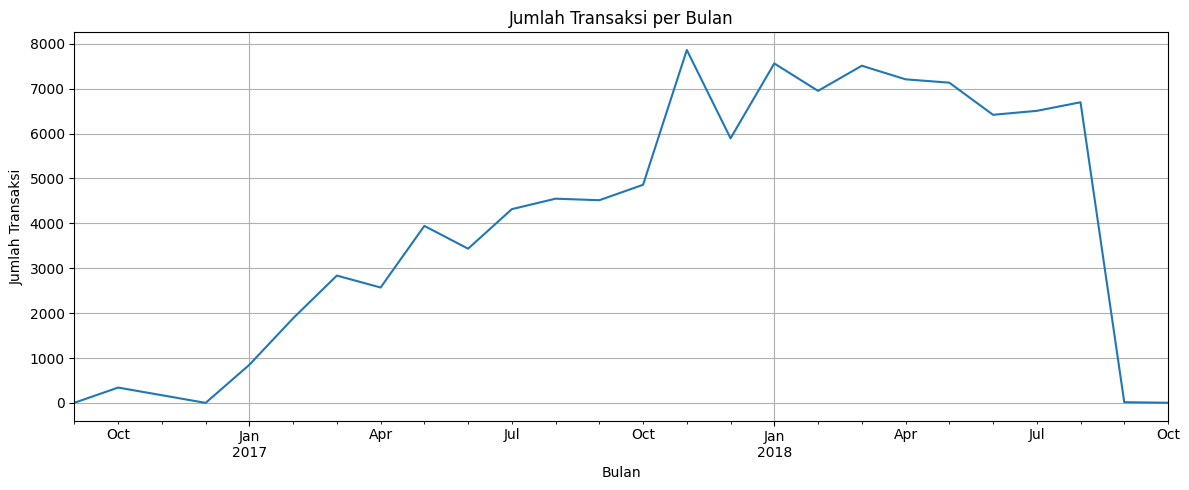

In [20]:
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
merged_df['order_purchase_month'] = merged_df['order_purchase_timestamp'].dt.to_period('M')

monthly_orders = merged_df.groupby('order_purchase_month').size()
monthly_orders.plot(kind='line', figsize=(12,5), title='Jumlah Transaksi per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.grid()
plt.tight_layout()
plt.show()

**Insight**:
Terdapat tren kenaikan yang konsisten pada jumlah transaksi dari awal tahun 2017 hingga sekitar pertengahan 2018. Ini mengindikasikan bahwa platform mengalami pertumbuhan jumlah pembeli atau peningkatan aktivitas belanja selama periode tersebut. Puncak transaksi terjadi pada bulan November 2017. Setelah puncak tersebut, terdapat sedikit penurunan namun tetap relatif stabil, menunjukkan bahwa pelanggan masih aktif bertransaksi meskipun tidak sebanyak bulan-bulan puncak.

### EDA Multivariate

In [13]:
avg_payment_per_city = merged_df.groupby('customer_city')['payment_value'].mean().sort_values(ascending=False).head(10)
print(avg_payment_per_city)

customer_city
pianco                     2324.99
nova esperanca do piria    2252.66
engenheiro navarro         2106.55
mariental                  1867.85
loreto                     1643.64
ibitita                    1534.58
barao ataliba nogueira     1351.51
barra longa                1341.55
paranatinga                1287.16
passagem                   1265.83
Name: payment_value, dtype: float64


**Insight:**
Beberapa kota kecil ternyata memiliki rata-rata pembayaran per transaksi yang lebih tinggi, meskipun jumlah transaksinya sedikit. Ini menunjukkan potensi pembeli bernilai tinggi di luar kota besar.

In [14]:
top5_cities = merged_df['customer_city'].value_counts().head(5).index
top5_city_payments = merged_df[merged_df['customer_city'].isin(top5_cities)]
city_payment_ct = pd.crosstab(top5_city_payments['customer_city'], top5_city_payments['payment_type'])
print(city_payment_ct)

payment_type    boleto  credit_card  debit_card  not_defined  voucher
customer_city                                                        
belo horizonte     468         2233          39            0      132
brasilia           394         1693          17            0       89
curitiba           336         1136          27            0       77
rio de janeiro    1123         5525         114            0      445
sao paulo         2783        12226         295            3      914


**Insight:**
Credit card mendominasi di semua kota besar, tapi boleto juga signifikan di beberapa kota seperti Brasilia dan Belo Horizonte, menandakan variasi preferensi metode pembayaran.

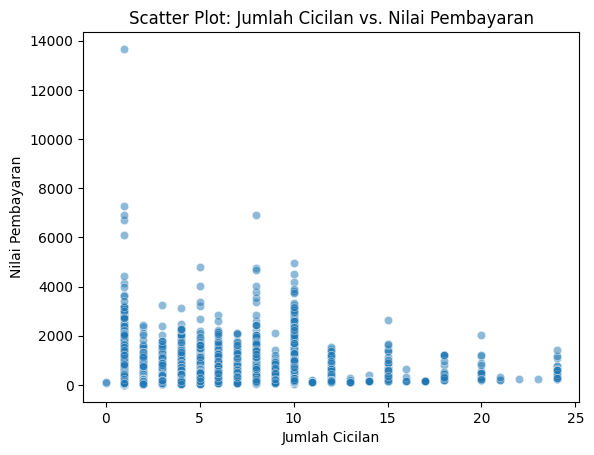

In [26]:
sns.scatterplot(data=merged_df, x='payment_installments', y='payment_value', alpha=0.5)
plt.title('Scatter Plot: Jumlah Cicilan vs. Nilai Pembayaran')
plt.xlabel('Jumlah Cicilan')
plt.ylabel('Nilai Pembayaran')
plt.show()

**Insight**:
Sebagian besar transaksi berada di cicilan 1 hingga 3 kali, dengan nilai pembayaran berkisar di bawah 500. Ini menunjukkan bahwa mayoritas pembeli lebih memilih pembayaran langsung atau cicilan pendek. Terdapat outlier pada cicilan yang lebih tinggi (misalnya 10-24 kali), dimana nilai pembayaran bisa sangat tinggi, hingga di atas 1000. Ini bisa jadi indikasi pembelian barang dengan harga tinggi atau langka. Distribusi data menyebar seiring bertambahnya jumlah cicilan, namun tidak menunjukkan hubungan linier yang kuat antara jumlah cicilan dan nilai pembayaran.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [27]:
# Hitung jumlah pembelian per kota
city_counts = merged_df['customer_city'].value_counts().head(10)

# Tampilkan hasilnya
print("Top 10 Kota dengan Frekuensi Pembelian Terbanyak:")
print(city_counts)

Top 10 Kota dengan Frekuensi Pembelian Terbanyak:
customer_city
sao paulo                16221
rio de janeiro            7207
belo horizonte            2872
brasilia                  2193
curitiba                  1576
campinas                  1515
porto alegre              1418
salvador                  1347
guarulhos                 1250
sao bernardo do campo      979
Name: count, dtype: int64


<ipython-input-28-76f41b1d8596>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_cities.index, y=top_cities.values, palette='Blues_d')


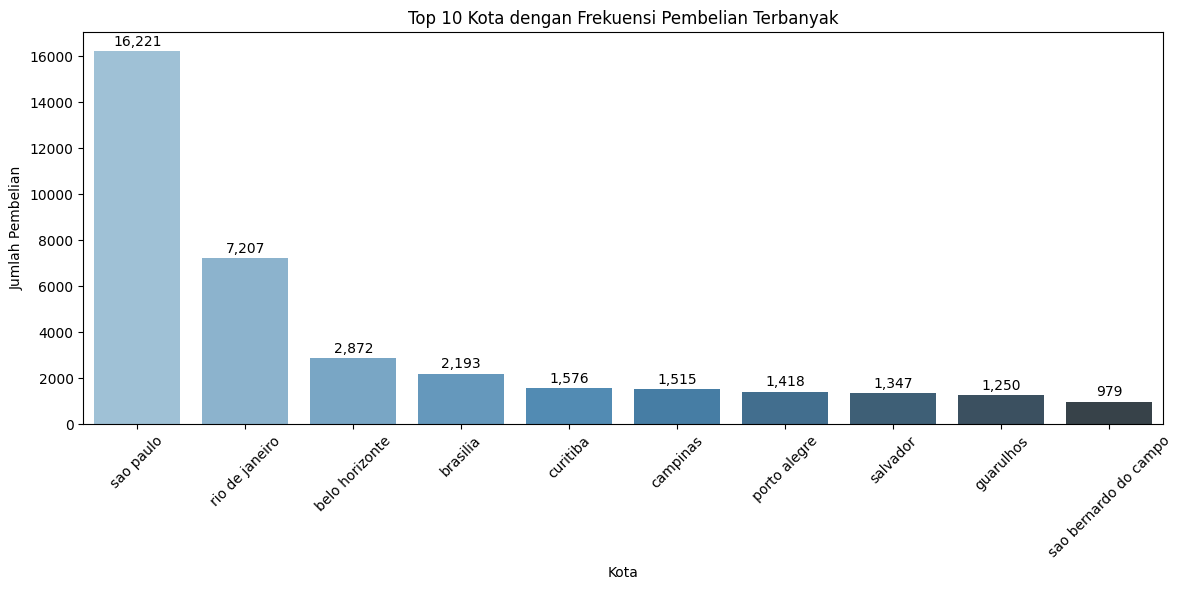

In [28]:
# Hitung jumlah pembelian per kota (Top 10)
top_cities = merged_df['customer_city'].value_counts().head(10)

# Plot
plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_cities.index, y=top_cities.values, palette='Blues_d')
plt.title("Top 10 Kota dengan Frekuensi Pembelian Terbanyak")
plt.xlabel("Kota")
plt.ylabel("Jumlah Pembelian")
plt.xticks(rotation=45)

# Tambahkan label angka
for i, value in enumerate(top_cities.values):
    ax.text(i, value + 100, f"{value:,}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Pertanyaan 2:

In [29]:
# Hitung jumlah penggunaan tiap metode pembayaran
payment_counts = merged_df['payment_type'].value_counts()

print("Metode Pembayaran Paling Sering Digunakan:")
print(payment_counts)

Metode Pembayaran Paling Sering Digunakan:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


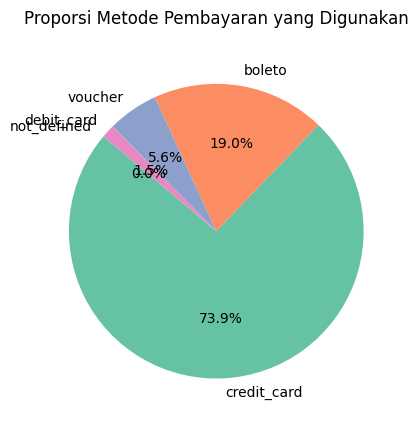

In [30]:
# Plot Pie Chart
plt.figure(figsize=(4,4.5))
plt.pie(payment_counts.values,
        labels=payment_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Set2.colors)

plt.title("Proporsi Metode Pembayaran yang Digunakan")
plt.axis('equal')  # Biar bulat sempurna
plt.tight_layout()
plt.show()

**Insight:**
- Dengan menggunakan tabel merged_df, saya dapat mencari Top 10 Kota dengan frekuensi pembelian terbanyak. Kota dengan pembelian terbanyak adalah Sao Paulo dengan 15695 transaksi, kemudian disusul rio de janeiro dengan 6916 transaksi, dan belo horizonte dengan 2792 transaksi.
- Dengan menggunakan tabel merged.df, saya dapat mencari metode pembayaran yang paling sering digunakan. Metode credit_card merupakan metode yang paling sering digunakan, yaitu sebanyak 74578 kali (74%). Kemudian disusul metode boleto 19177 kali (19%), voucher 5493 kali (5,5%), dan debit_card 1485 kali (1,5%).
- Ini berarti sebagian besar pembeli berasal dari kota Sao Paulo dan lebih memilih menggunakan kartu kredit sebagai metode pembayaran utama.

## Analisis Lanjutan (Opsional)

### Clustering customer

In [31]:
# Hitung jumlah transaksi per customer
customer_freq = merged_df['customer_id'].value_counts().reset_index()
customer_freq.columns = ['customer_id', 'jumlah_transaksi']

In [32]:
# Manual grouping
def group_customer(freq):
    if freq <= 2:
        return 'Low'
    elif freq <= 5:
        return 'Medium'
    else:
        return 'High'

customer_freq['cluster_group'] = customer_freq['jumlah_transaksi'].apply(group_customer)

In [33]:
customer_freq['cluster_group'].value_counts()

,count
cluster_group,
Low,98861
Medium,461
High,118


<ipython-input-34-44ed28e825e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='cluster_group', data=customer_freq, order=['Low', 'Medium', 'High'], palette='Blues')


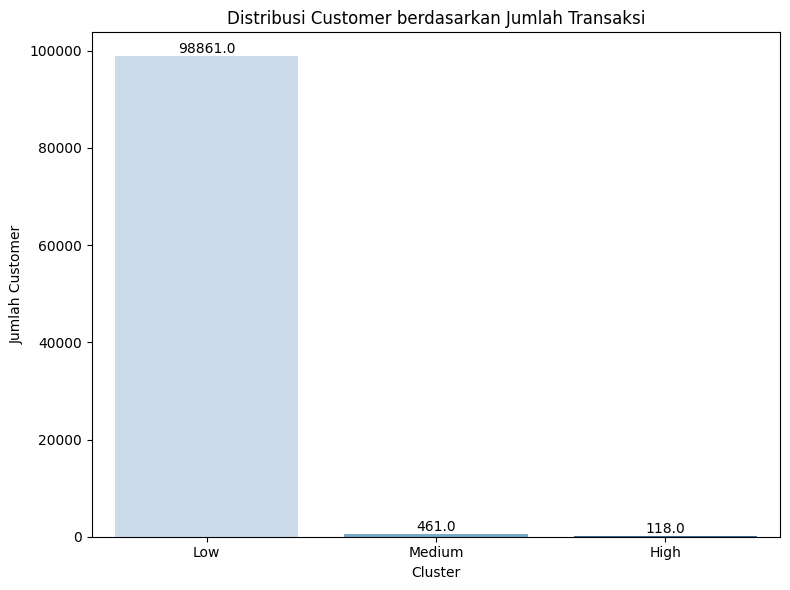

In [34]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='cluster_group', data=customer_freq, order=['Low', 'Medium', 'High'], palette='Blues')

plt.title("Distribusi Customer berdasarkan Jumlah Transaksi")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")

# Tambahkan angka di atas batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

**Insight:**
- Mayoritas pelanggan (95.892 orang) masuk dalam kategori Low artinya, sebagian besar pelanggan hanya melakukan 1 atau 2 kali transaksi selama periode data. Hanya sebagian kecil pelanggan yang berada dalam kategori High. Pelanggan dengan frekuensi tinggi relatif sedikit (111 orang), namun mereka bisa jadi customer loyal yang memiliki nilai penting. Sedangkan, kategori Medium berada di tengah-tengah sebanyak 451 orang.

## Conclusion

- Dari analisis terhadap data transaksi yang telah dibersihkan dan digabung, diperoleh bahwa kota dengan jumlah transaksi pembelian terbanyak adalah São Paulo dengan total 15.695 transaksi. Disusul oleh Rio de Janeiro dengan 6.916 transaksi, dan Belo Horizonte sebanyak 2.792 transaksi. Mayoritas transaksi terjadi di kota-kota besar di Brasil, yang kemungkinan memiliki populasi tinggi dan infrastruktur e-commerce yang lebih matang. Kota-kota ini merupakan pasar utama yang potensial dan dapat menjadi target prioritas untuk kampanye pemasaran, ekspansi layanan, atau peningkatan kualitas pengiriman/logistik.
- Metode pembayaran yang paling dominan digunakan oleh pelanggan adalah credit_card, dengan total 74.578 kali transaksi, atau sekitar 74% dari keseluruhan pembayaran. Disusul oleh Boleto: 19.177 transaksi (19%), Voucher: 5.493 transaksi (5,5%), Debit_card: 1.485 transaksi (1,5%). Tingginya penggunaan kartu kredit menunjukkan preferensi konsumen terhadap metode pembayaran yang fleksibel. Perusahaan dapat bekerja sama dengan penerbit kartu kredit untuk memberikan promosi khusus, cicilan tanpa bunga, atau loyalty program berbasis kartu kredit. Metode lain seperti boleto juga masih signifikan, yang berarti perusahaan tetap perlu menyediakan opsi pembayaran tradisional untuk menjangkau segmen pelanggan yang lebih luas.

In [35]:
merged_df.to_csv("all_data.csv", index=False)